   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53939 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53939 non-null  float64
 8   y        53940 non-null  float64
 9   z        53930 non-null  float64
dtypes: f

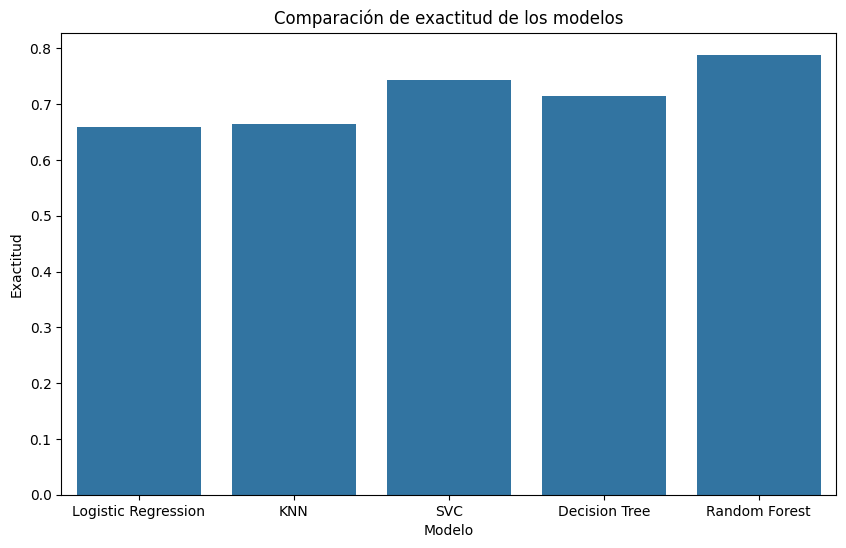

El mejor modelo en términos de exactitud es: Random Forest con una exactitud de 0.7887


In [5]:
# Importación de librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga y exploración de datos
# Cargar el dataset utilizando una ruta absoluta
data = pd.read_csv('/workspace/diamonds.csv')

# Visualización inicial de los datos
print(data.head())
print(data.info())
print(data.describe())

# 2. Preprocesamiento de datos

# Manejo de valores faltantes: Usamos SimpleImputer para imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']] = imputer.fit_transform(data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])

# Codificación de variables categóricas
label_encoder = LabelEncoder()
data['cut'] = label_encoder.fit_transform(data['cut'])
data['color'] = label_encoder.fit_transform(data['color'])
data['clarity'] = label_encoder.fit_transform(data['clarity'])

# Separación de características (X) y la variable objetivo (y)
X = data.drop(columns=['cut'])  # Todas las columnas excepto la columna "cut"
y = data['cut']  # Columna objetivo

# Dividir el dataset en conjunto de entrenamiento y prueba (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de los datos (importante para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Implementación de modelos de clasificación

# Lista para almacenar resultados
model_results = {}

# Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
model_results['Logistic Regression'] = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
model_results['KNN'] = accuracy_score(y_test, y_pred_knn)
print("KNN:")
print(classification_report(y_test, y_pred_knn))

# Support Vector Classifier
svc = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
model_results['SVC'] = accuracy_score(y_test, y_pred_svc)
print("SVC:")
print(classification_report(y_test, y_pred_svc))

# Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0, min_samples_leaf=1, max_features=None)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
model_results['Decision Tree'] = accuracy_score(y_test, y_pred_tree)
print("Decision Tree:")
print(classification_report(y_test, y_pred_tree))

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_features='sqrt', min_samples_leaf=1, ccp_alpha=0.0)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
model_results['Random Forest'] = accuracy_score(y_test, y_pred_rf)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# 4. Comparación de resultados de los modelos

# Crear un gráfico de barras para mostrar los resultados de exactitud
model_names = list(model_results.keys())
accuracies = list(model_results.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Comparación de exactitud de los modelos')
plt.xlabel('Modelo')
plt.ylabel('Exactitud')
plt.show()

# Conclusión
best_model = max(model_results, key=model_results.get)
print(f"El mejor modelo en términos de exactitud es: {best_model} con una exactitud de {model_results[best_model]:.4f}")
